In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
m1 = int(df.LotFrontage.mean())
print(m1)
df.LotFrontage.fillna(m1, inplace=True)

70


In [19]:
m2 = int(df.MasVnrArea.mean())
print(m2)
df.MasVnrArea.fillna(m2, inplace=True)

103


In [22]:
m3 = int(df.GarageYrBlt.mean())
print(m3)
df.GarageYrBlt.fillna(m3, inplace=True)

1978


In [23]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [24]:
df['Street'] = np.where(df['Street'] == 'Pave', 0, 1)

df['Street']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Street, Length: 1460, dtype: int32

In [33]:
a = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',\
     'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF1',\
     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
     'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
     'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',\
     'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',\
     '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [34]:
final = df[a]
final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,706,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,978,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,486,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,216,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,655,...,192,84,0,0,0,0,0,12,2008,250000


In [35]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [36]:
final.to_csv('reduced.csv', index=False)

In [43]:
b = ['OverallQual', 'GrLivArea', 'MSSubClass', 'GarageCars', 'BedroomAbvGr',\
     'YearBuilt', 'MasVnrArea', 'OverallCond', 'TotRmsAbvGrd', 'LotArea',\
     'BsmtFullBath', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'ScreenPorch',\
     'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', 'FullBath', 'SalePrice']

In [44]:
df1 = df[b]
df1.head()

,OverallQual,GrLivArea,MSSubClass,GarageCars,BedroomAbvGr,YearBuilt,MasVnrArea,OverallCond,TotRmsAbvGrd,LotArea,BsmtFullBath,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,ScreenPorch,YearRemodAdd,KitchenAbvGr,Fireplaces,FullBath,SalePrice
0,7,1710,60,2,3,2003,196.0,5,8,8450,1,706,0,856,0,2003,1,0,2,208500
1,6,1262,20,2,3,1976,0.0,8,6,9600,0,978,298,1262,0,1976,1,1,2,181500
2,7,1786,60,2,3,2001,162.0,5,6,11250,1,486,0,920,0,2002,1,1,2,223500
3,7,1717,70,3,3,1915,0.0,5,7,9550,1,216,0,756,0,1970,1,1,1,140000
4,8,2198,60,3,4,2000,350.0,5,9,14260,1,655,192,1145,0,2000,1,1,2,250000


In [46]:
X = df1.drop(['SalePrice'], axis=1)
X.head()

,OverallQual,GrLivArea,MSSubClass,GarageCars,BedroomAbvGr,YearBuilt,MasVnrArea,OverallCond,TotRmsAbvGrd,LotArea,BsmtFullBath,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,ScreenPorch,YearRemodAdd,KitchenAbvGr,Fireplaces,FullBath
0,7,1710,60,2,3,2003,196.0,5,8,8450,1,706,0,856,0,2003,1,0,2
1,6,1262,20,2,3,1976,0.0,8,6,9600,0,978,298,1262,0,1976,1,1,2
2,7,1786,60,2,3,2001,162.0,5,6,11250,1,486,0,920,0,2002,1,1,2
3,7,1717,70,3,3,1915,0.0,5,7,9550,1,216,0,756,0,1970,1,1,1
4,8,2198,60,3,4,2000,350.0,5,9,14260,1,655,192,1145,0,2000,1,1,2


In [47]:
y = df1['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [51]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
# Evaluate each model in turn
results=[]
names=[]
seed=7

models = []
models.append(('LR',LinearRegression()))
models.append(('RFR',RandomForestRegressor()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.735694(0.200288)
RFR:0.816890(0.107250)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN:0.006389(0.005833)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA:0.010042(0.011148)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


NB:0.011877(0.010879)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM:0.016405(0.009776)


In [79]:
train = []
test = []

for i in range(1, 150):
    rfr = RandomForestRegressor(n_estimators=i, random_state=1)
    rfr.fit(X_train, y_train)
    train.append(rfr.score(X_train, y_train))
    test.append(rfr.score(X_test, y_test))

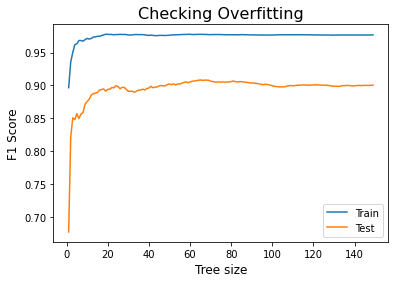

In [80]:
import matplotlib.pyplot as plt
max_d = [i for i in range(1,150)]

plt.plot(max_d,train, label = 'Train')
plt.plot(max_d,test, label = 'Test')
plt.xlabel('Tree size',fontsize = 12)
plt.ylabel('F1 Score',fontsize = 12)
plt.title('Checking Overfitting', fontsize = 16)
plt.legend()

In [81]:
score_test = test[:]
score_test.sort(reverse=True)
print(score_test[:5])

[0.9084463249293714, 0.9080308258900599, 0.9079654226323742, 0.9079118730163227, 0.9076563910739728]


In [82]:
np.argmax(test)+1

65

In [83]:
for i in range(75, 85):
    print(i, test[i])

75 0.905125876408608
76 0.905083359223443
77 0.9052106240396105
78 0.9051832544643282
79 0.9057592448720304
80 0.9067739134854523
81 0.9058194816394624
82 0.905150098553442
83 0.9057567719427061
84 0.9057037842541305


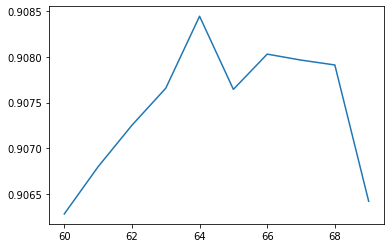

In [87]:
plt.plot([i for i in range(60, 70)],test[60:70], label = 'Test')

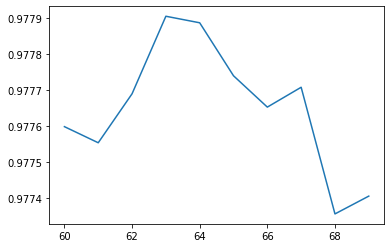

In [88]:
plt.plot([i for i in range(60, 70)],train[60:70], label = 'Train')

**65**

In [90]:
rfr = RandomForestRegressor(n_estimators=65, random_state=1)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9778875957260881
0.9084463249293714


# Test

In [101]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [102]:
test_data = test_data[b]
test_data.head()

,OverallQual,GrLivArea,MSSubClass,GarageCars,BedroomAbvGr,YearBuilt,MasVnrArea,OverallCond,TotRmsAbvGrd,LotArea,BsmtFullBath,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,ScreenPorch,YearRemodAdd,KitchenAbvGr,Fireplaces,FullBath
0,5,896,20,1.0,2,1961,0.0,6,5,11622,0.0,468.0,140,882.0,120,1961,1,0,1
1,6,1329,20,1.0,3,1958,108.0,6,6,14267,0.0,923.0,393,1329.0,0,1958,1,0,1
2,5,1629,60,2.0,3,1997,0.0,5,6,13830,0.0,791.0,212,928.0,0,1998,1,1,2
3,6,1604,60,2.0,3,1998,20.0,6,7,9978,0.0,602.0,360,926.0,0,1998,1,1,2
4,8,1280,120,2.0,2,1992,0.0,5,5,5005,0.0,263.0,0,1280.0,144,1992,1,0,2


In [103]:
test_data.describe()

,OverallQual,GrLivArea,MSSubClass,GarageCars,BedroomAbvGr,YearBuilt,MasVnrArea,OverallCond,TotRmsAbvGrd,LotArea,BsmtFullBath,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,ScreenPorch,YearRemodAdd,KitchenAbvGr,Fireplaces,FullBath
count,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000,1444.000000,1459.000000,1459.000000,1459.000000,1457.000000,1458.000000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000
mean,6.078821,1486.045922,57.378341,1.766118,2.854010,1971.357779,100.709141,5.553804,6.385195,9819.161069,0.434454,439.203704,93.174777,1046.117970,17.064428,1983.662783,1.042495,0.58122,1.570939
std,1.436812,485.566099,42.746880,0.775945,0.829788,30.390071,177.625900,1.113740,1.508895,4955.517327,0.530648,455.268042,127.744882,442.898624,56.609763,21.130467,0.208472,0.64742,0.555190
min,1.000000,407.000000,20.000000,0.000000,0.000000,1879.000000,0.000000,1.000000,3.000000,1470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.00000,0.000000
25%,5.000000,1117.500000,20.000000,1.000000,2.000000,1953.000000,0.000000,5.000000,5.000000,7391.000000,0.000000,0.000000,0.000000,784.000000,0.000000,1963.000000,1.000000,0.00000,1.000000
50%,6.000000,1432.000000,50.000000,2.000000,3.000000,1973.000000,0.000000,5.000000,6.000000,9399.000000,0.000000,350.500000,0.000000,988.000000,0.000000,1992.000000,1.000000,0.00000,2.000000
75%,7.000000,1721.000000,70.000000,2.000000,3.000000,2001.000000,164.000000,6.000000,7.000000,11517.500000,1.000000,753.500000,168.000000,1305.000000,0.000000,2004.000000,1.000000,1.00000,2.000000
max,10.000000,5095.000000,190.000000,5.000000,6.000000,2010.000000,1290.000000,9.000000,15.000000,56600.000000,3.000000,4010.000000,1424.000000,5095.000000,576.000000,2010.000000,2.000000,4.00000,4.000000


In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   MSSubClass    1459 non-null   int64  
 3   GarageCars    1458 non-null   float64
 4   BedroomAbvGr  1459 non-null   int64  
 5   YearBuilt     1459 non-null   int64  
 6   MasVnrArea    1444 non-null   float64
 7   OverallCond   1459 non-null   int64  
 8   TotRmsAbvGrd  1459 non-null   int64  
 9   LotArea       1459 non-null   int64  
 10  BsmtFullBath  1457 non-null   float64
 11  BsmtFinSF1    1458 non-null   float64
 12  WoodDeckSF    1459 non-null   int64  
 13  TotalBsmtSF   1458 non-null   float64
 14  ScreenPorch   1459 non-null   int64  
 15  YearRemodAdd  1459 non-null   int64  
 16  KitchenAbvGr  1459 non-null   int64  
 17  Fireplaces    1459 non-null   int64  
 18  FullBath      1459 non-null 

In [107]:
m4 = int(test_data.GarageCars.mean())
print(m4)
test_data.GarageCars.fillna(m4, inplace=True)

1


In [109]:
m5 = int(test_data.MasVnrArea.mean())
print(m5)
test_data.MasVnrArea.fillna(m5, inplace=True)

100


In [111]:
test_data.BsmtFullBath.value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [112]:
test_data.BsmtFullBath.fillna(0, inplace=True)

In [115]:
m6 = int(test_data.BsmtFinSF1.mean())
print(m6)
test_data.BsmtFinSF1.fillna(m6, inplace=True)

439


In [117]:
m7 = int(test_data.TotalBsmtSF.mean())
print(m7)
test_data.TotalBsmtSF.fillna(m7, inplace=True)

1046


In [118]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   MSSubClass    1459 non-null   int64  
 3   GarageCars    1459 non-null   float64
 4   BedroomAbvGr  1459 non-null   int64  
 5   YearBuilt     1459 non-null   int64  
 6   MasVnrArea    1459 non-null   float64
 7   OverallCond   1459 non-null   int64  
 8   TotRmsAbvGrd  1459 non-null   int64  
 9   LotArea       1459 non-null   int64  
 10  BsmtFullBath  1459 non-null   float64
 11  BsmtFinSF1    1459 non-null   float64
 12  WoodDeckSF    1459 non-null   int64  
 13  TotalBsmtSF   1459 non-null   float64
 14  ScreenPorch   1459 non-null   int64  
 15  YearRemodAdd  1459 non-null   int64  
 16  KitchenAbvGr  1459 non-null   int64  
 17  Fireplaces    1459 non-null   int64  
 18  FullBath      1459 non-null 

In [119]:
test_preds = rfr.predict(test_data)

In [121]:
u = pd.read_csv('test.csv')

In [122]:
output = pd.DataFrame({'Id': u.Id,'SalePrice': test_preds})

output.to_csv('submission.csv', index=False)